# The big short:
## Looking for investment opportunities in forex in times of crisis

![banner](https://s.wsj.net/public/resources/images/ED-AT276_melame_M_20150211182809.jpg)

## Abstract

Trading is a banquete for data analysts, and in this project we look into the forex market for currency appreciations from 1999 to 2022. This period englobes 3 major crisis on the market, namely the dot-com crash in the late 90's, the sub-prime crisis in 2007-2008, and the political fallout from Coronavirus in 2020 onwards. Our findings are as follows:

* during the dot-com crisis and immediately thereafter, the currencies from the UK, USA, Japan, Korea, Poland, China, Norway, and Israel massively appreciated;
* during the sub-prime crisis from 2007-2008, the euro itself (€0.625/US $), the chinese and slovakian currencies presented strong appreciation;
* from the onset of the epidemic until now, Israel, China, and Switzerland were the most prominent currencies keeping an upward trend.

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>

One of the most prolific areas for data analysis is the trade market, where daily stocks are bought and sold at massive volumes with varying rates and lots of money is involved. These stacks of cash are a function of a multitude of factors combined with pure especulation, and data analysis can provide valuable insights both for day-traders, as for holders. One of the most heated trade markets is forex, i.e., exchange between currencies, which was shook by the release of the euro.

It wasn't until 1999 that the euro really began its journey, when 11 countries (Austria, Belgium, Finland, France, Germany, Ireland, Italy, Luxembourg, the Netherlands, Portugal and Spain) fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. Today euro is 20+ years old.

In our project, we'll look into the daily euro exchange rates, relative to several other currencies. The exchange rate is what one gets out of 1 euro in every listed currency.



## 2. Goals and limitations<a name="section2"></a>

1. Create a chart highlighting the peaking rate for the dollar (in Euros).
2. List most appreciated currencies during dot-com bubble, subprime-crisis, and Corona
3. List the best currency for holders during this time.

Limitations:

* Current knowledge prevents me from plotting scatter charts with equations that best fit them, calculating outliers;
* Current knowledge prevents me from calculating gaussian equations that best fit a histogram, calculating outliers;

## 3. Methodology<a name="section3"></a>

We'll deploy pandas and matplotlib to analyze different time series, seaborn to check for data integrity, along with storytelling visualization techniques to bolden our message.

## 4. Metadata<a name="section4"></a>

The csv file is available on [kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). 

The dataset contains date and Euro rate ranging from 1999 to 2022. The rates are usually updated around 16:00 CET on every working day, except on TARGET closing days. The currencies involved are: 
* Australian dollar;
* Bulgarian lev,
* Brazilian real;
* Canadian dollar;
* Swiss franc;
* Chinese yuan renminbi, 
* Cypriot pound, 
* Czech koruna, 
* Danish krone, 
* Estonian kroon, 
* UK pound sterling, 
* Greek drachma, 
* Hong Kong dollar, 
* Croatian kuna, 
* Hungarian forint, 
* Indonesian rupiah, 
* Israeli shekel, 
* Indian rupee, 
* Iceland krona, 
* Japanese yen, 
* Korean won, 
* Lithuanian litas, 
* Latvian lats, 
* Maltese lira, 
* Mexican peso, 
* Malaysian ringgit, 
* Norwegian krone, 
* New Zealand dollar, 
* Philippine peso, 
* Polish zloty, 
* Romanian leu, 
* Russian rouble, 
* Swedish krona, 
* Singapore dollar, 
* Slovenian tolar, 
* Slovak koruna, 
* Thai baht, 
* Turkish lira, 
* US dollar, 
* South African rand.

Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).
Bulgarian lev since 2002 is pegged to the Euro: 1 € = 1.9558 leva.

## 5. Data Exploration and Transformation<a name="section5"></a>
1. Check for datatype
2. Missing/duplicated values
3. unwated rows/columns and reasonableness


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.style as style
from matplotlib.patches import Polygon
import numpy as np
import seaborn as sns
import datetime as dt
import re

In [2]:
#1 check for daatype
x = pd.read_csv(r'C:\Users\thais\Desktop\Dataquest\Data Analyst Python\2\euro_daily_99_22.csv')
x
#questions = pd.read_csv(r'C:\Users\thais\Desktop\Dataquest\Data Analyst Python\5\myq.csv', parse_dates=['CreationDate'])

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6307,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6308,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6309,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
x.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [4]:
#1 check for datatype
def camel_snake_converter(name):
    return re.sub(r'(?<!^)(?=\s)', '_', name).lower()
x_2=x.copy()
x_2.columns = x_2.columns.str.replace('[', '', regex=True)
x_2.columns = x_2.columns.str.replace(']', '€', regex=True)
x_2.columns = x_2.columns.str.strip()
x_2.rename(camel_snake_converter, axis=1, inplace=True)
x_2.columns = x_2.columns.str.replace(' ', '', regex=True)
x_2.rename({r'period\unit:': 'date'}, axis=1, inplace=True)
x_2.columns

Index(['date', 'australian_dollar_€', 'bulgarian_lev_€', 'brazilian_real_€',
       'canadian_dollar_€', 'swiss_franc_€', 'chinese_yuan_renminbi_€',
       'cypriot_pound_€', 'czech_koruna_€', 'danish_krone_€',
       'estonian_kroon_€', 'uk_pound_sterling_€', 'greek_drachma_€',
       'hong_kong_dollar_€', 'croatian_kuna_€', 'hungarian_forint_€',
       'indonesian_rupiah_€', 'israeli_shekel_€', 'indian_rupee_€',
       'iceland_krona_€', 'japanese_yen_€', 'korean_won_€',
       'lithuanian_litas_€', 'latvian_lats_€', 'maltese_lira_€',
       'mexican_peso_€', 'malaysian_ringgit_€', 'norwegian_krone_€',
       'new_zealand_dollar_€', 'philippine_peso_€', 'polish_zloty_€',
       'romanian_leu_€', 'russian_rouble_€', 'swedish_krona_€',
       'singapore_dollar_€', 'slovenian_tolar_€', 'slovak_koruna_€',
       'thai_baht_€', 'turkish_lira_€', 'us_dollar_€', 'south_african_rand_€'],
      dtype='object')

In [5]:
#1. check for datatype
x_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     6311 non-null   object 
 1   australian_dollar_€      6311 non-null   object 
 2   bulgarian_lev_€          5909 non-null   object 
 3   brazilian_real_€         6043 non-null   object 
 4   canadian_dollar_€        6311 non-null   object 
 5   swiss_franc_€            6311 non-null   object 
 6   chinese_yuan_renminbi_€  6043 non-null   object 
 7   cypriot_pound_€          2346 non-null   object 
 8   czech_koruna_€           6311 non-null   object 
 9   danish_krone_€           6311 non-null   object 
 10  estonian_kroon_€         3130 non-null   object 
 11  uk_pound_sterling_€      6311 non-null   object 
 12  greek_drachma_€          520 non-null    object 
 13  hong_kong_dollar_€       6311 non-null   object 
 14  croatian_kuna_€         

There are 41 columns and 5700 rows. There are plenty of null values, either by missing data or due to country transitioning to Euro. We should turn all columns into floats, and 'date' to datetime object, so we can sort our datatable in chronological order. The rates are all in different units, i.e., the local currency. In order to standardize all columns, let's have the rate reversed.

In [6]:
#1 check for datatype
x_3 = x_2.copy()
x_3['date'] = pd.to_datetime(x_3['date'])
# x_3['date'] = x_3['date'].dt.strftime('%Y-%m-%d')
x_3.sort_values('date', inplace=True)
x_3.reset_index(drop=True, inplace=True)
x_3 = x_3.replace('-', np.nan, regex=True)
cols = list(x_3.columns)
popped = cols.pop(0)
for c in cols:
    x_3[c] = x_3[c].astype(float)
    x_3[c]=x_3[c]**(-1)
x_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     6311 non-null   datetime64[ns]
 1   australian_dollar_€      6249 non-null   float64       
 2   bulgarian_lev_€          5851 non-null   float64       
 3   brazilian_real_€         5982 non-null   float64       
 4   canadian_dollar_€        6249 non-null   float64       
 5   swiss_franc_€            6249 non-null   float64       
 6   chinese_yuan_renminbi_€  5982 non-null   float64       
 7   cypriot_pound_€          2304 non-null   float64       
 8   czech_koruna_€           6249 non-null   float64       
 9   danish_krone_€           6249 non-null   float64       
 10  estonian_kroon_€         3074 non-null   float64       
 11  uk_pound_sterling_€      6249 non-null   float64       
 12  greek_drachma_€          514 non-n

In [7]:
#2. unwanted rows/columns and reasonableness
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(x_3.describe(include='all', datetime_is_numeric=True))

,date,australian_dollar_€,bulgarian_lev_€,brazilian_real_€,canadian_dollar_€,swiss_franc_€,chinese_yuan_renminbi_€,cypriot_pound_€,czech_koruna_€,danish_krone_€,estonian_kroon_€,uk_pound_sterling_€,greek_drachma_€,hong_kong_dollar_€,croatian_kuna_€,hungarian_forint_€,indonesian_rupiah_€,israeli_shekel_€,indian_rupee_€,iceland_krona_€,japanese_yen_€,korean_won_€,lithuanian_litas_€,latvian_lats_€,maltese_lira_€,mexican_peso_€,malaysian_ringgit_€,norwegian_krone_€,new_zealand_dollar_€,philippine_peso_€,polish_zloty_€,romanian_leu_€,russian_rouble_€,swedish_krona_€,singapore_dollar_€,slovenian_tolar_€,slovak_koruna_€,thai_baht_€,turkish_lira_€,us_dollar_€,south_african_rand_€
count,6311,6249.000000,5851.000000,5982.000000,6249.000000,6249.000000,5982.000000,2304.000000,6249.000000,6249.000000,3.074000e+03,6249.000000,514.000000,6249.000000,5880.000000,6249.000000,6249.000000,5981.000000,5982.000000,3904.000000,6249.000000,6249.000000,4097.000000,3842.000000,2304.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,5932.000000,6249.000000,6249.000000,2049.000000,2560.000000,6249.000000,6249.000000,6249.000000,6249.000000
mean,2011-02-23 18:47:24.176834304,0.640015,0.511611,0.325235,0.685348,0.774016,0.120060,1.729143,0.036133,0.134265,6.391165e-02,1.309545,0.003021,0.109861,0.133968,0.003505,0.000081,0.220877,0.015740,0.010044,0.007937,0.000751,0.284357,1.519228,2.379862,0.066019,0.229027,0.116836,0.558137,0.017775,0.240941,0.272413,0.024007,0.105705,0.583793,0.004476,0.025620,0.024346,0.539852,0.855191,0.092811
min,1999-01-04 00:00:00,0.482276,0.509684,0.143775,0.551785,0.595132,0.088621,1.698370,0.025918,0.133811,6.391165e-02,1.021920,0.002935,0.080191,0.128703,0.002322,0.000055,0.167960,0.010862,0.003279,0.005891,0.000502,0.211981,1.408649,2.254791,0.036915,0.192838,0.081192,0.391619,0.013028,0.201918,0.200872,0.008532,0.085372,0.447968,0.004166,0.021060,0.018679,0.046334,0.625391,0.047586
25%,2005-01-19 12:00:00,0.599377,0.511300,0.248379,0.650068,0.647668,0.105283,1.718213,0.033141,0.134082,6.391165e-02,1.155962,0.002969,0.098276,0.132240,0.003198,0.000064,0.191004,0.012700,0.007241,0.007335,0.000699,0.289620,1.423488,2.329373,0.048807,0.210194,0.106052,0.509087,0.016010,0.229321,0.219202,0.014513,0.098870,0.507975,0.004175,0.023381,0.022190,0.253254,0.763767,0.064704
50%,2011-02-07 00:00:00,0.626566,0.511300,0.319402,0.683340,0.779059,0.123791,1.730703,0.037008,0.134280,6.391165e-02,1.243626,0.003025,0.108434,0.133698,0.003561,0.000077,0.212337,0.014732,0.011191,0.007756,0.000750,0.289620,1.436575,2.344391,0.059172,0.218775,0.121117,0.566604,0.017140,0.238493,0.233585,0.024882,0.107458,0.604047,0.004342,0.024444,0.024850,0.451671,0.844024,0.089621
75%,2017-03-27 12:00:00,0.674809,0.511300,0.388799,0.715666,0.907029,0.131974,1.740402,0.039160,0.134434,6.391165e-02,1.467674,0.003073,0.117868,0.135501,0.003927,0.000088,0.250094,0.017810,0.011947,0.008524,0.000800,0.289620,1.598402,2.433090,0.073009,0.243149,0.125739,0.601649,0.018836,0.251269,0.281571,0.029014,0.110262,0.638774,0.004684,0.026685,0.026392,0.578369,0.917515,0.113861
max,2023-05-26 00:00:00,0.859180,0.514377,0.639795,0.823791,1.059659,0.152551,1.751406,0.043539,0.134709,6.391165e-02,1.751007,0.003117,0.155374,0.140845,0.004383,0.000149,0.307342,0.025976,0.014691,0.011198,0.001065,0.302911,1.926411,2.575328,0.131168,0.316947,0.138456,0.720254,0.027147,0.311983,0.774473,0.043121,0.124146,0.722648,0.005344,0.033194,0.030117,2.701972,1.211827,0.164514
std,NaN,0.063480,0.000774,0.106012,0.045827,0.130003,0.015558,0.013091,0.004083,0.000204,2.317968e-15,0.176710,0.000055,0.015169,0.002302,0.000459,0.000021,0.033436,0.003681,0.002615,0.000982,0.000086,0.014556,0.138048,0.068169,0.022895,0.026820,0.012221,0.059505,0.002721,0.018724,0.098883,0.008512,0.007469,0.069529,0.000341,0.002984,0.002664,0.499431,0.119051,0.030948


We now have the values of each currency unit expressed in euros. The data seems reasonable and without repeated values. We should check if there is any 0 value (free currency).

In [8]:
#3. Mising/duplicate values
duplicates = x_3.loc[:,'australian_dollar_€':].duplicated()

In [9]:
duplicates.sum()

61

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(x_3[duplicates])

,date,australian_dollar_€,bulgarian_lev_€,brazilian_real_€,canadian_dollar_€,swiss_franc_€,chinese_yuan_renminbi_€,cypriot_pound_€,czech_koruna_€,danish_krone_€,estonian_kroon_€,uk_pound_sterling_€,greek_drachma_€,hong_kong_dollar_€,croatian_kuna_€,hungarian_forint_€,indonesian_rupiah_€,israeli_shekel_€,indian_rupee_€,iceland_krona_€,japanese_yen_€,korean_won_€,lithuanian_litas_€,latvian_lats_€,maltese_lira_€,mexican_peso_€,malaysian_ringgit_€,norwegian_krone_€,new_zealand_dollar_€,philippine_peso_€,polish_zloty_€,romanian_leu_€,russian_rouble_€,swedish_krona_€,singapore_dollar_€,slovenian_tolar_€,slovak_koruna_€,thai_baht_€,turkish_lira_€,us_dollar_€,south_african_rand_€
339,2000-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,2000-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,2000-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,2000-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,2001-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,2001-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,2001-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some rows of empty data due to holidays. These are ok to exclude from our table.


In [11]:
#3. Mising/duplicate values
if 0 in x_3:#.loc[:,'australian_dollar':]:
    print("There are zero's in the dataframe")
else:
    print("dataframe is rid of 0's")#.value_counts(dropna=True, ascending=True).head(5)


dataframe is rid of 0's


Text(0.5, 23.38159722222222, 'Columns')

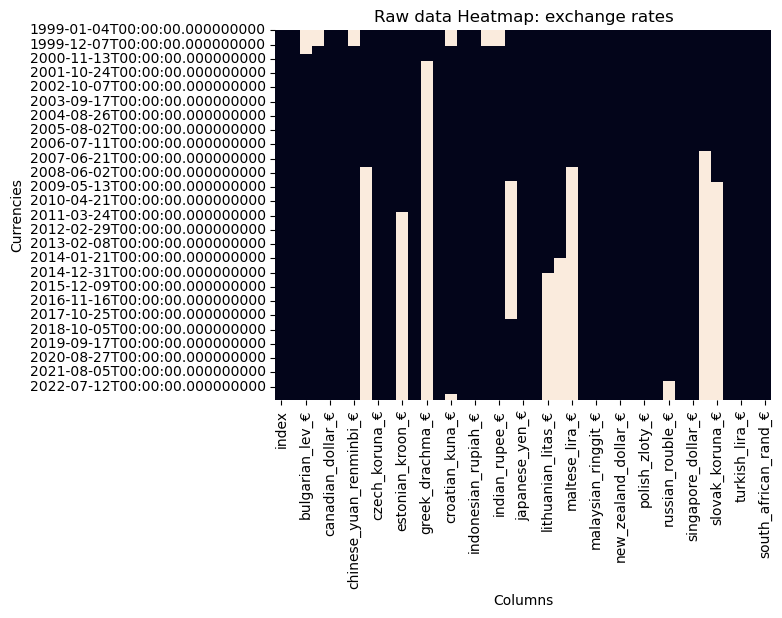

In [12]:
#3. Mising/duplicate values
x_4 =x_3[~duplicates].copy()

x_5 = x_4.reset_index().set_index('date')
sns.heatmap(x_5.isnull(), cbar=False)
plt.title('Raw data Heatmap: exchange rates')
plt.ylabel('Currencies')
plt.xlabel('Columns')

There is one column there with missing data in the middle of the series. The country probably starts with I.

In [13]:
x_4['iceland_krona_€'].value_counts(dropna=False, normalize=True)

NaN         0.37536
0.007179    0.00336
0.007231    0.00320
0.003279    0.00320
0.007241    0.00304
             ...   
0.012463    0.00016
0.012516    0.00016
0.012327    0.00016
0.012355    0.00016
0.013273    0.00016
Name: iceland_krona_€, Length: 1947, dtype: float64

## 6. Data Visualization and Analysis<a name="section6"></a>
Our project focus is on best performance through the 3 crisis contained in the time series: dot-com bubble in the late 90's, sub-prime crisis in 2007-2008, and Covid.

In order to address the project questions, we will select a few key countries to compare our values: Australia, Switzerland, US Bulgaria, Slovakia, Denmark, Great Britain, Lithuania, Croacia; global economies: Brazil, Japan, China, Singapore, Korea.

Since our values are measured in Euros, we can only access each performance relative to our reference. That is to say if an australian dollar remained stable during one year, but the american dollar sky-rocketed, it probably means that both euro and australian dollar depreciated compared to the dollar.

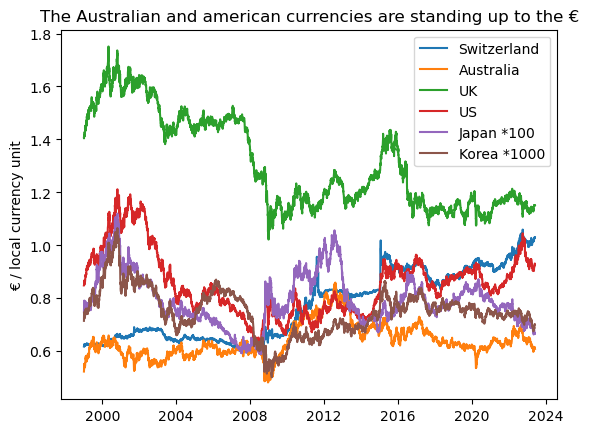

In [14]:
plt.plot(x_4['date'], x_4['swiss_franc_€'], label='Switzerland')
plt.plot(x_4['date'], x_4['australian_dollar_€'], label='Australia')
plt.plot(x_4['date'], x_4['uk_pound_sterling_€'], label='UK')
plt.plot(x_4['date'], x_4['us_dollar_€'], label='US')
plt.plot(x_4['date'], x_4['japanese_yen_€']*100, label='Japan *100')
plt.plot(x_4['date'], x_4['korean_won_€']*1000, label='Korea *1000')
plt.legend()
plt.title('The Australian and american currencies are standing up to the €')
plt.ylabel('€ / local currency unit')
plt.show()

In the first chart, we can see strong performances of the british pound, the american dollar, the Japanese, and Korean currencies during the dot-com crisis, which was also shortly lived by Australia. However, all countries receeded to lower levels than the beggining of their series before they were hit by the sub-prime crisis (which indicates a strengthening Euro in this period, specially during the crisis).

In the turn of the decade, countries have had distinct appreciations: the UK never really recovered its pre-subprime-crisis levels, whereas most countries bounced back up for a while before slowly returning to pre-subprime-crisis levels or worse until 2020.

Looking at the impact on each country during Covid, we can see most have bounced and stabilized at the same level or worse, except for Swirtzeland, which has admirably maintained a steady growth throughout this century.


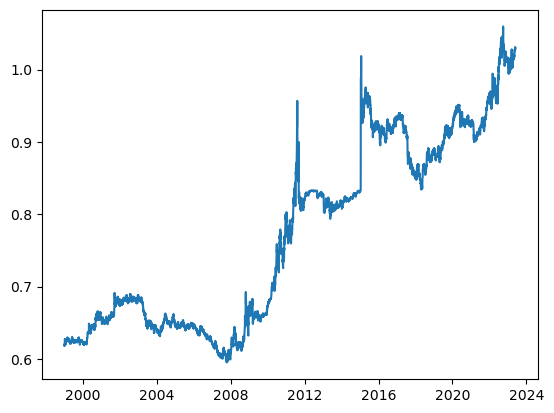

In [15]:
plt.plot(x_4['date'], x_4['swiss_franc_€'], label='Switzerland')

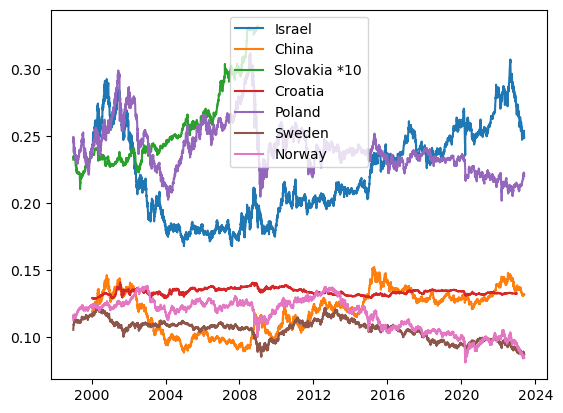

In [16]:
plt.plot(x_4['date'], x_4['israeli_shekel_€'], label='Israel')
plt.plot(x_4['date'], x_4['chinese_yuan_renminbi_€'], label='China')
plt.plot(x_4['date'], x_4['slovak_koruna_€']*10, label='Slovakia *10')
plt.plot(x_4['date'], x_4['croatian_kuna_€'], label='Croatia')
plt.plot(x_4['date'], x_4['polish_zloty_€'], label='Poland')
plt.plot(x_4['date'], x_4['swedish_krona_€'], label='Sweden')
plt.plot(x_4['date'], x_4['norwegian_krone_€'], label='Norway')
# plt.plot(x_4['date'], x_4['us_dollar_€'], label='USA')
plt.legend()
plt.show()

During the dot-com crisis and its fallout, we can see most countries drew back to their original levels or worse by 2004. The Baltic states of Slovakia and Croatia were stable exceptions. 

During the sub-prime crisis in 2007-2008, we can see a positive influence for China, Israel and Slovakia (before they retired their currency in 2009), while Croatia remained stable and Poland was negatively impacted.

Up until 2020 and past the pandemic, Israel and China kept an upward trend, whereas Sweden, Norway and Poland devalued compared to the Euro.

Let's check the dollar performance on the peak of the subprime crisis, introducing a rolling average of 30 days to smooth the chart.

In [17]:
x_4['us_rolling_mean_30'] = x_4.loc[:,'us_dollar_€'].rolling(30).mean()
rectangle = x_4.loc[x_4['us_dollar_€']<=1/1.5]
rectangle

,date,australian_dollar_€,bulgarian_lev_€,brazilian_real_€,canadian_dollar_€,swiss_franc_€,chinese_yuan_renminbi_€,cypriot_pound_€,czech_koruna_€,danish_krone_€,...,russian_rouble_€,swedish_krona_€,singapore_dollar_€,slovenian_tolar_€,slovak_koruna_€,thai_baht_€,turkish_lira_€,us_dollar_€,south_african_rand_€,us_rolling_mean_30
2387,2008-02-27,0.624181,0.5113,0.397062,0.678334,0.622123,0.093072,NaN,0.039923,0.134145,...,0.027497,0.107117,0.475896,NaN,0.030472,0.022272,0.562019,0.664717,0.089152,0.680453
2388,2008-02-28,0.623519,0.5113,0.395836,0.676636,0.623558,0.092971,NaN,0.039773,0.134171,...,0.027479,0.106740,0.473866,NaN,0.030497,0.022267,0.558971,0.661332,0.087886,0.679807
2389,2008-02-29,0.616295,0.5113,0.392218,0.671366,0.629525,0.092713,NaN,0.039638,0.134201,...,0.027434,0.106442,0.472545,NaN,0.030741,0.021372,0.549964,0.659326,0.085245,0.679069
2390,2008-03-03,0.614477,0.5113,0.389045,0.668986,0.633433,0.092589,NaN,0.039891,0.134219,...,0.027379,0.106775,0.472032,NaN,0.030731,0.020783,0.538300,0.657765,0.083405,0.677978
2391,2008-03-04,0.613346,0.5113,0.394384,0.665115,0.633995,0.092546,NaN,0.040135,0.134225,...,0.027381,0.106826,0.473575,NaN,0.030883,0.020795,0.541067,0.657635,0.083706,0.676901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,2009-11-30,0.607829,0.5113,0.380938,0.629644,0.663526,0.097500,NaN,0.038263,0.134365,...,0.022738,0.095664,0.481024,NaN,NaN,0.020020,0.435161,0.665646,0.089750,0.670599
2846,2009-12-01,0.611434,0.5113,0.382614,0.634478,0.663174,0.097186,NaN,0.038536,0.134369,...,0.022769,0.095983,0.480261,NaN,NaN,0.019986,0.441267,0.663394,0.090362,0.670447
2847,2009-12-02,0.614931,0.5113,0.385356,0.634276,0.663482,0.097079,NaN,0.038503,0.134374,...,0.022671,0.096700,0.480077,NaN,NaN,0.019988,0.442048,0.662691,0.090531,0.670197
2848,2009-12-03,0.614402,0.5113,0.387432,0.630001,0.662998,0.096877,NaN,0.038745,0.134378,...,0.022712,0.096938,0.479662,NaN,NaN,0.019970,0.446170,0.661376,0.090630,0.670020


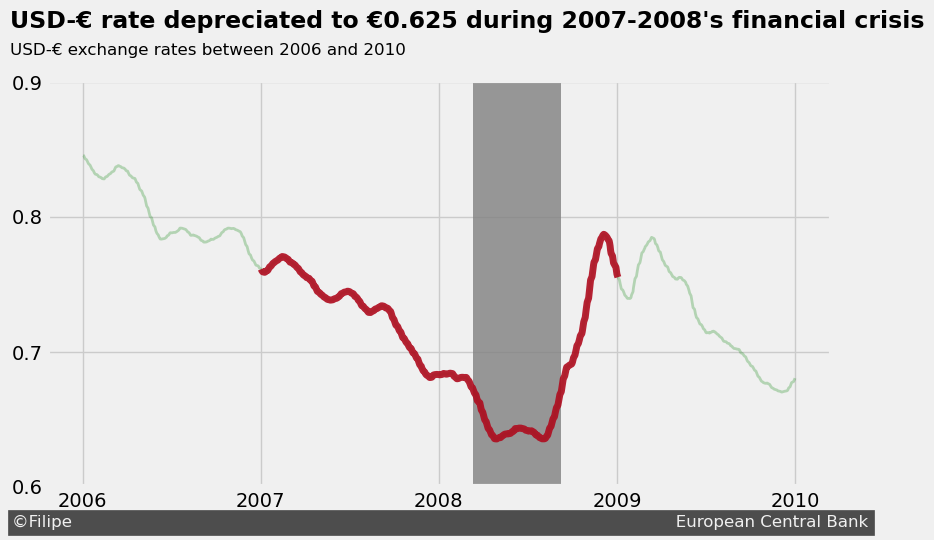

In [18]:
analysis_data = x_4[(x_4['date']>='20060102') & (x_4['date']<='20100102')]
crisis_data = x_4[(x_4['date']>='20070102') & (x_4['date']<='20090102')]

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(analysis_data['date'], analysis_data['us_rolling_mean_30'],  color='green', linewidth=2, alpha=0.25)
ax.plot(crisis_data['date'], crisis_data['us_rolling_mean_30'],  color='#af0b1e', linewidth=5, alpha=0.9)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_yticks([])
ax.set_yticks([0.6, 0.7, 0.8, 0.9])
ax.text(13000, 0.94,"USD-€ rate depreciated to €0.625 during 2007-2008's financial crisis",size=17, weight='bold')
ax.text(13000, 0.92,"USD-€ exchange rates between 2006 and 2010",size=12)
ax.text(13005, 0.57, '©Filipe' + ' '*115 + 'European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12)

rectangle=plt.Rectangle((13950, 0.6), 180, 1, fc='grey', alpha=0.8)
plt.gca().add_patch(rectangle)
plt.show()


We can see the rolling average of the dollar tanking to nearly €0.625 around June'08 (slightly above because we are deploying rolling average, and not daily values).

## 7. Conclusion<a name="section7"></a>

In this project, we set out to find which currencies exceled during times of crisis. We managed to see that for:

* the dot-com crisis and immediately thereafter, the currencies from the UK, USA, Japan, Korea, Poland, China, Norway, and Israel massively appreciated compared to the Euro. Following that pump, these currencies wilted from 2004 until 2007 prior to the sub-prime crisis. On the other hand, the swiss franc, the slovakian koruna, and the croatian kuna had stable to positive performances.

* the sub-prime crisis: the Euro itself (given most countries depreciated in comparison), along with China and Slovakia, whose currencies appreciated compared to the euro. The swiss franc was somewhat affected, but was one of the quickest to bounce back;

* Corona virus: Up until 2020 and past the pandemic, Israel, China, and Switzerland were the most prominent currencies keeping an upward trend.

The most appreciation registered overall during the time series would be the swiss franc(was €0.65, now €1.05), and the israeli shekel from 2004 onwards (was €0.175, now €0.23)

The euro highest appreciation was during the sub-prime crisis, where one dollar was worth only €0.625.

Next steps:

* Look for daytrade opportunities in the currency market comparing 2 currencies in a scatter plot, ploting best fit, and looking for outliers.
* Look for arbitrage opportunities in the currency market comparing 3 currencies.